In [12]:
!pip install -q beautifulsoup4==4.12.2 PyMuPDFb==1.24.10 PyMuPDF==1.24.13 tqdm==4.66.5 duckdb==0.10.0 tabulate==0.9.0 plotly==5.20.0 python-dotenv openai==1.42.0

In [13]:
SYMBOL = "SCC"

In [14]:
import requests
import pandas as pd


session = requests.Session()
session.get(f"https://www.settrade.com/th/equities/quote/{SYMBOL}/financial-statement/full")


headers = {
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'en-TH,en;q=0.9,th-TH;q=0.8,th;q=0.7,en-GB;q=0.6,en-US;q=0.5',
    # 'cookie': 'visid_incap_2685215=l/JAPqmmR8KSk7rLhs3BzKvPSGYAAAAAQUIPAAAAAABALhVFFEmAe3vRYqQgqqQo; exp_history={"go_expid":"5AD93i4KR9-ZVNOhL9Vr2w-V2","msgt":"popup","count":1}; _cc_id=4d4cfaa1a003693b7c5cc45baf0913e9; __gads=ID=f9d48026689a99be:T=1716047793:RT=1716047793:S=ALNI_Ma_zJhrDoYFiXyfutD1XSHxPWA3Uw; __gpi=UID=00000e2256455e78:T=1716047793:RT=1716047793:S=ALNI_Mby0wdaHRd_h-eJjYJY5wLHS0TJAQ; __eoi=ID=2567fce2f1c28622:T=1716047793:RT=1716047793:S=AA-AfjaTaPE5D-KD9jKsPW8xY0gE; cto_bundle=44weE19pQlBrWWZRQUdySnclMkJmNXlkNkk4blI2MTgwTGNzSUZGSSUyRjRjdGRsUUZMZ1pWSDViOHIlMkY1c3lHc0NuZjBReDUlMkZVd21FT3piZkJ0MmE3bEEyRCUyQlVqYlFWbWpGVkQ0S1gxMlZUQTdIZXV3T05iN2VqbGZKWlNqRnloTm5jT3ltTnBCS1kzc3lxVWFUVEcxWFhHd2FnUjdCb1VMRWFzcmJKaG1SWm0lMkZqJTJGcE03c0UwJTJGYXRHU3FpUiUyQlhSRWlhMkxNd2o; cto_bidid=b-mYHF9lQlh6WHpHZHNta0hieDFuZ21FQ2dKQjdWRnR2RHNydllBQ2hkZEhOb1RxRzFhM1hGU29zbDgxcVdHOTFCQm1jJTJCb0ZaOVdGdjBPcCUyQnVmTGVVTUJHUmtCNDVkNTBOM1ZMdG9sVWg2OER1TFZDaENRNFElMkZjTjYwaFpGY0lsV3hjUUozZ2NUJTJGRG1KWWl5QlNqWWE5TVlKUSUzRCUzRA; visid_incap_2868064=9TnELvraSEyQ3rCeC/3tp6/imGYAAAAAQUIPAAAAAABQXj/9u+lgqIuVKksYLcer; _ga_W7C0TNQT63=GS1.1.1721377038.3.1.1721377082.0.0.0; charlot=6a8621f0-cdcf-45a6-b1c2-f81785e2d02f; _gcl_au=1.1.1685208698.1724255273; _gid=GA1.2.1052211754.1724255275; api_call_counter=5; SET_COOKIE_POLICY=20231111093657; nlbi_2685215=IC0uOhgeyBy9J7BzwZdY4QAAAAAqEQh9oBWiKDUUC927BZYM; _cbclose=1; _cbclose64035=1; route=0f35441e6abd8a06b9ca7c7f54fa2b5e; incap_ses_235_2685215=SjIpB/f0VXZxsG4/XeNCAyHexmYAAAAA4/zIE2DbjM+Hy9alp/2MXA==; landing_url=https://www.settrade.com/th/equities/quote/OR/overview?_gl=1%2a9iyx2w%2a_gcl_au%2aMTYwODA1NzI0NS4xNzIzNjQzNjg2%2a_ga%2aMTgyMzgyMTUxNS4xNzE1NTk1MjY5%2a_ga_ET2H60H2CB%2aMTcyNDI1NTIxMS4yNi4xLjE3MjQyNTU0ODguNDkuMC4w; _uid64035=DB23855A.7; _ctout64035=1; _gat_UA-29750633-11=1; _ga=GA1.1.1767658003.1716047789; _ga_W11E901KXL=GS1.1.1724324251.9.1.1724324280.31.0.0; _ga_6WS2P0P25V=GS1.1.1724324251.9.1.1724324280.31.0.0',
    'if-none-match': '"342c523b"',
    'priority': 'u=1, i',
    'referer': 'https://www.settrade.com/th/equities/quote/OR/financial-statement/full',
    'sec-ch-ua': '"Not)A;Brand";v="99", "Google Chrome";v="127", "Chromium";v="127"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36',
}

def get_sheet(period: str) -> pd.DataFrame:
    params = {
        'accountType': 'balance_sheet',
        'fsType': 'company',
        'period': period,
#         'language': 'th',
        'language': 'ENG',
    }

    response = session.get(
        'https://www.settrade.com/api/set/stock/OR/financialstatement',
        params=params,
        headers=headers,
    )
    response.raise_for_status()
    data = response.json()
    return pd.DataFrame(data["accounts"])

In [15]:
sheet = get_sheet(f"YE_2019")[["accountCode", "accountName", "amount"]]
sheet["2019"] = sheet["amount"]
sheet = sheet.drop("amount", axis=1)
for year in range(2020, 2024):
    sheet_by_year = get_sheet(f"YE_{year}")[["accountCode", "amount"]]
    sheet_by_year[str(year)] = sheet_by_year["amount"]
    sheet_by_year = sheet_by_year.drop("amount", axis=1)

    sheet = pd.merge(sheet, sheet_by_year, on="accountCode")

sheet


,accountCode,accountName,2019,2020,2021,2022,2023
0,100000,สินทรัพย์,NaN,NaN,NaN,NaN,NaN
1,110000,สินทรัพย์หมุนเวียน,NaN,NaN,NaN,NaN,NaN
2,110100,เงินสดและรายการเทียบเท่าเงินสด,2.219107e+07,1.547259e+07,4.208571e+07,3.352787e+07,4.637919e+07
3,112000,ลูกหนี้การค้าและลูกหนี้หมุนเวียนอื่น - สุทธิ,3.863834e+07,2.954003e+07,3.395491e+07,6.732296e+07,3.957663e+07
4,112300,เงินให้กู้ยืมระยะสั้นและดอกเบี้ยค้างรับ,1.645080e+06,2.168960e+06,2.354819e+06,3.071465e+06,2.962576e+06
5,112900,สินค้าคงเหลือ - สุทธิ,1.940587e+07,1.690591e+07,2.242222e+07,2.455037e+07,3.046247e+07
6,119900,สินทรัพย์หมุนเวียนอื่น,4.159655e+05,3.991063e+05,2.729488e+05,2.517932e+05,2.573735e+05
7,119990,สินทรัพย์หมุนเวียนอื่น - อื่น ๆ,4.159655e+05,3.991063e+05,2.729488e+05,2.517932e+05,2.573735e+05
8,119999,รวมสินทรัพย์หมุนเวียน,8.417526e+07,6.605606e+07,1.225051e+08,1.305702e+08,1.201620e+08
9,120000,สินทรัพย์ไม่หมุนเวียน,NaN,NaN,NaN,NaN,NaN


In [16]:
from string import Template


template = Template("""
Stock name: ${SYMBOL}

Balance sheet: ${sheet}
Structure:


Your task:
${task}
""")
sheet_prompt = sheet.drop("accountCode", axis=1).to_markdown(index=False)
print(
    template.safe_substitute(
        SYMBOL=SYMBOL,
        sheet=sheet_prompt,
    )
)


Stock name: SCC

Balance sheet: | accountName                                             |              2019 |              2020 |              2021 |             2022 |              2023 |
|:--------------------------------------------------------|------------------:|------------------:|------------------:|-----------------:|------------------:|
| สินทรัพย์                                                  |     nan           |     nan           |     nan           |    nan           |     nan           |
| สินทรัพย์หมุนเวียน                                           |     nan           |     nan           |     nan           |    nan           |     nan           |
| เงินสดและรายการเทียบเท่าเงินสด                              |       2.21911e+07 |       1.54726e+07 |       4.20857e+07 |      3.35279e+07 |       4.63792e+07 |
| ลูกหนี้การค้าและลูกหนี้หมุนเวียนอื่น - สุทธิ                         |       3.86383e+07 |       2.954e+07   |       3.39549e+07 |      6.7323e+07  |       3.

# Set up LLM

In [17]:
import os
from dotenv import load_dotenv
from openai import OpenAI
import google.generativeai as genai
from typing_extensions import TypedDict
from IPython.display import Markdown
from google.colab import userdata


GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GEMINI_API_KEY)


MODEL = "typhoon-v1.5x-70b-instruct"



TYPHOON_API_KEY = userdata.get('TYPHOON_API_KEY')
MODEL = "typhoon-v1.5x-70b-instruct"
client = OpenAI(
   api_key=TYPHOON_API_KEY,
   base_url='https://api.opentyphoon.ai/v1'
)


class ChatTurn(TypedDict):
    role: str
    content: str


def get_open_ai_completion(
    prompt: str,
    model: str = MODEL,
    stream: bool = False,
    initial_message: list[ChatTurn]| None = None,
    temperature: float = 0
) -> str:
    if initial_message is None:
        initial_message = []
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model, messages=messages, temperature=temperature, stream=stream
    )
    if not stream:
        return response.choices[0].message.content
    else:
        result = ""
        for chunk in response:
            content = chunk.choices[0].delta.content
            print(content, end="")
            if isinstance(content, str):
                result += content
        return result


def get_gemini_completion(
    prompt: str,
    stream: bool = False,
) -> str:
    # model = genai.GenerativeModel("gemini-1.5-pro")
    model = genai.GenerativeModel("gemini-1.5-flash")
    response = model.generate_content(prompt)
    return response.text

In [18]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet.drop("accountCode", axis=1).to_markdown(index=False),
    task="Analyse this stock balance sheet in Thai"
)
Markdown(get_gemini_completion(prompt))

## วิเคราะห์งบดุลของหุ้น SCC

งบดุลแสดงถึงภาพรวมของสินทรัพย์ หนี้สิน และส่วนของผู้ถือหุ้น ณ วันที่สิ้นงวด โดยสรุปผลการวิเคราะห์งบดุลของ SCC ในช่วงปี 2562 ถึง 2566 มีดังนี้

**สินทรัพย์:**

* **สินทรัพย์หมุนเวียน:** สินทรัพย์ที่สามารถแปลงเป็นเงินสดได้ภายในหนึ่งปี เช่น เงินสด ลูกหนี้การค้า สินค้าคงเหลือ 
    * **เงินสดและรายการเทียบเท่าเงินสด:** SCC มีเงินสดและรายการเทียบเท่าเงินสดเพิ่มขึ้นอย่างต่อเนื่องในช่วงปี 2562 ถึง 2566 แสดงถึงสภาพคล่องที่ดีของบริษัท
    * **ลูกหนี้การค้าและลูกหนี้หมุนเวียนอื่น - สุทธิ:** ลูกหนี้ของ SCC มีความผันผวนในช่วงหลายปีที่ผ่านมา 
    * **เงินให้กู้ยืมระยะสั้นและดอกเบี้ยค้างรับ:**  มียอดเงินให้กู้ยืมระยะสั้นที่ค่อนข้างคงที่ 
    * **สินค้าคงเหลือ - สุทธิ:** SCC มีสินค้าคงเหลือที่เพิ่มขึ้นในช่วงปี 2562 ถึง 2566 แสดงถึงการเติบโตของธุรกิจ
    * **สินทรัพย์หมุนเวียนอื่น:** มีมูลค่าที่ค่อนข้างน้อยและมีการเปลี่ยนแปลงไม่มากนัก

* **สินทรัพย์ไม่หมุนเวียน:** สินทรัพย์ที่มีอายุการใช้งานเกินหนึ่งปี เช่น เงินลงทุน อสังหาริมทรัพย์ ที่ดิน อาคาร และอุปกรณ์ สินทรัพย์ไม่มีตัวตน 
    * **เงินลงทุนในบริษัทย่อย บริษัทร่วม และการร่วมค้า ที่บันทึกด้วยวิธีอื่น - สุทธิ:** SCC มีการลงทุนในบริษัทย่อย บริษัทร่วม และการร่วมค้า ที่มีการเติบโตอย่างต่อเนื่อง แสดงถึงความมุ่งมั่นในการขยายธุรกิจ 
    * **อสังหาริมทรัพย์เพื่อการลงทุน - สุทธิ:** มียอดเพิ่มขึ้นเรื่อยๆ แสดงถึงการลงทุนด้านอสังหาริมทรัพย์เพื่อการลงทุน
    * **ที่ดิน อาคาร และอุปกรณ์ - สุทธิ:** SCC มีมูลค่าที่ดิน อาคาร และอุปกรณ์ที่เพิ่มขึ้นอย่างต่อเนื่อง แสดงถึงการขยายฐานการผลิตหรือการลงทุนในสินทรัพย์ถาวร 
    * **สินทรัพย์ไม่มีตัวตน - สุทธิ:**  มีมูลค่าลดลงในช่วงปี 2562 ถึง 2566 
    * **ค่าความนิยม - สุทธิ:** ค่าความนิยมของ SCC มีการคงที่ แสดงถึงการรักษามูลค่าแบรนด์หรือทรัพย์สินทางปัญญา 
    * **สินทรัพย์ไม่หมุนเวียนอื่น:** มีการเปลี่ยนแปลงที่สำคัญในปี 2563 ซึ่งอาจสะท้อนถึงการลงทุนหรือการขายสินทรัพย์อื่นๆ

**หนี้สิน:**

* **หนี้สินหมุนเวียน:** หนี้สินที่ต้องชำระภายในหนึ่งปี เช่น เจ้าหนี้การค้า เงินกู้ยืมระยะสั้น 
    * **เจ้าหนี้การค้าและเจ้าหนี้หมุนเวียนอื่น:** หนี้สินของ SCC มีการเพิ่มขึ้นอย่างต่อเนื่องในช่วงหลายปีที่ผ่านมา 
    * **เงินกู้ยืมระยะสั้น:** ยอดเงินกู้ยืมระยะสั้นลดลงในช่วงปี 2562 ถึง 2566 แสดงถึงการใช้หนี้ระยะสั้นที่เพิ่มขึ้น
    * **บุคคลหรือกิจการที่เกี่ยวข้องกัน:**  
    * **ส่วนของหนี้สินระยะยาวส่วนที่ถึงกำหนดชำระภายในหนึ่งปี:** หนี้สินระยะยาวที่ต้องชำระภายในหนึ่งปี 
    * **ประมาณการหนี้สินระยะสั้น:** 
    * **หนี้สินหมุนเวียนอื่น:** มีมูลค่าค่อนข้างคงที่

* **หนี้สินไม่หมุนเวียน:** หนี้สินที่มีอายุการใช้งานเกินหนึ่งปี เช่น หนี้สินระยะยาว หนี้สินทางการเงินไม่หมุนเวียนอื่น 
    * **หนี้สินระยะยาว - ส่วนที่ถึงกำหนดชำระเกินกว่าหนึ่งปี:** หนี้สินระยะยาวของ SCC มีการลดลงอย่างต่อเนื่องในช่วงหลายปีที่ผ่านมา แสดงถึงการใช้หนี้ระยะยาวที่เพิ่มขึ้น
    * **หนี้สินทางการเงินไม่หมุนเวียนอื่น:** มีมูลค่าเพิ่มขึ้นในช่วงปี 2562 ถึง 2566  อาจสะท้อนถึงการรับเงินมัดจำหรือการลงทุนในสินทรัพย์อื่นๆ
    * **ประมาณการหนี้สินระยะยาว:** 
    * **ประมาณการหนี้สินผลประโยชน์พนักงาน - ไม่หมุนเวียน:**  
    * **หนี้สินภาษีเงินได้รอตัดบัญชี:** 
    * **หนี้สินไม่หมุนเวียนอื่น:** มียอดเพิ่มขึ้นในช่วงปี 2562 ถึง 2566

**ส่วนของผู้ถือหุ้น:**

* **ทุนจดทะเบียน:**  SCC มีทุนจดทะเบียนเพิ่มขึ้นในปี 2564 แสดงถึงการเพิ่มทุนจดทะเบียนเพื่อรองรับการขยายธุรกิจ
* **หุ้นสามัญจดทะเบียน:**  
* **ทุนที่ออกและชำระแล้ว:**  SCC มีทุนที่ออกและชำระแล้วเพิ่มขึ้นในปี 2564  
* **หุ้นสามัญชำระแล้ว:** 
* **กำไร (ขาดทุน) สะสม:**  SCC มีกำไรสะสมที่เพิ่มขึ้นอย่างต่อเนื่องในช่วงปี 2562 ถึง 2566 แสดงถึงความสามารถในการทำกำไรของบริษัท 
* **กำไรสะสม - จัดสรรแล้ว:** 
* **สำรองตามกฎหมาย:** 
* **กำไร (ขาดทุน) สะสม - ยังไม่ได้จัดสรร:** 
* **องค์ประกอบอื่นของส่วนของผู้ถือหุ้น:** มีการเปลี่ยนแปลงที่สำคัญในปี 2562 และ 2563 

**สรุป:**

* SCC มีสภาพคล่องที่ดีและมีความสามารถในการทำกำไร 
* บริษัทมีการเติบโตของสินทรัพย์ทั้งหมุนเวียนและไม่หมุนเวียน
* SCC มีการลดหนี้สินระยะยาวและระยะสั้นอย่างต่อเนื่อง 
* มีการเพิ่มทุนจดทะเบียนเพื่อรองรับการขยายธุรกิจ 

**หมายเหตุ:** 

* การวิเคราะห์นี้เป็นเพียงส่วนหนึ่งของการวิเคราะห์งบดุลโดยรวม 
* ควรพิจารณาข้อมูลเพิ่มเติม เช่น งบกำไรขาดทุน งบกระแสเงินสด และข้อมูลอื่นๆ เพื่อให้ได้ภาพรวมที่ชัดเจนของบริษัท 
* นอกจากนี้ ควรพิจารณาปัจจัยอื่นๆ เช่น สภาพเศรษฐกิจ สภาพการแข่งขันในอุตสาหกรรม เพื่อให้ได้มุมมองที่สมบูรณ์มากขึ้น 


In [19]:
import matplotlib
import matplotlib.font_manager as fm
from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf -O Sarabun-Regular.ttf

if 'Sarabun' not in [x.name for x in matplotlib.font_manager.fontManager.ttflist]:
    matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

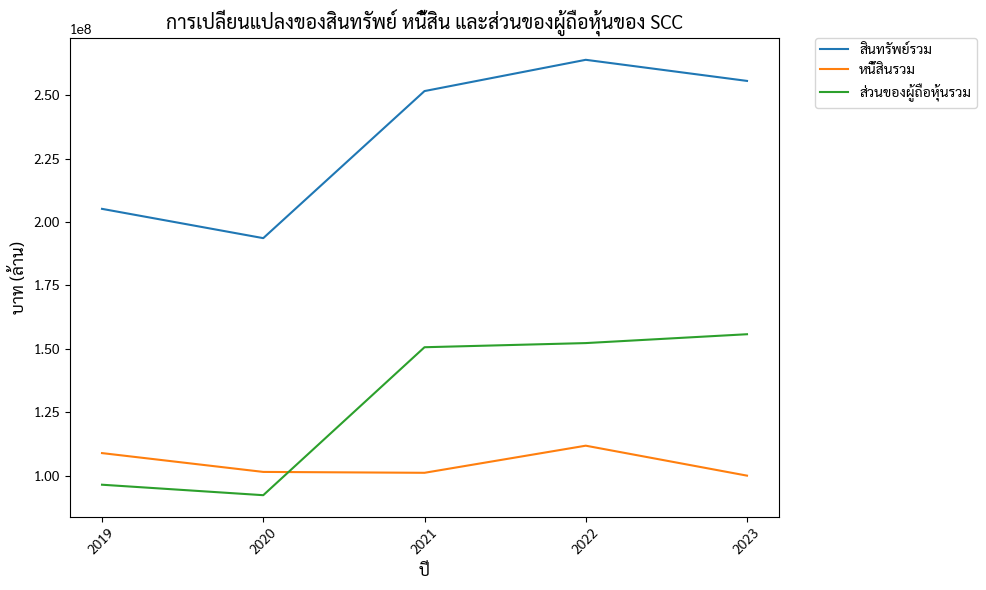


## สรุปผลการวิเคราะห์

จากการวิเคราะห์งบดุลของ SCC พบว่า:

- สินทรัพย์รวมของ SCC มีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่องในช่วง 5 ปีที่ผ่านมา แสดงให้เห็นถึงการเติบโตของธุรกิจและการลงทุนในสินทรัพย์ใหม่ ๆ 
- หนี้สินรวมของ SCC มีแนวโน้มลดลงในช่วง 5 ปีที่ผ่านมา แสดงให้เห็นถึงการลดภาระหนี้สินและการปรับปรุงโครงสร้างทางการเงิน 
- ส่วนของผู้ถือหุ้นของ SCC มีแนวโน้มเพิ่มขึ้นอย่างต่อเนื่องในช่วง 5 ปีที่ผ่านมา แสดงให้เห็นถึงความสามารถในการสร้างกำไรและคืนผลตอบแทนให้แก่ผู้ถือหุ้น 

โดยรวมแล้ว SCC มีฐานะทางการเงินที่มั่นคงและมีแนวโน้มการเติบโตที่ดี 


In [20]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet.drop("accountCode", axis=1).to_markdown(index=False),
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought how this data can support the investors
2. Use Matplotlib to create some visualisations to ease investors. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix."""
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)

In [21]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet.drop("accountCode", axis=1).to_markdown(index=False),
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Comment file header and show your thought about income structure of this company.
2. Use Plotly to create some visualisations to ease investors. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix."""
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)


## สรุปผลการวิเคราะห์

จากการวิเคราะห์งบดุลของ SCC พบว่าบริษัทมีฐานะทางการเงินที่แข็งแกร่ง โดยมีสินทรัพย์และส่วนของผู้ถือหุ้นเพิ่มขึ้นอย่างต่อเนื่องในช่วงหลายปีที่ผ่านมา 

- **สินทรัพย์**: มีการเติบโตอย่างต่อเนื่อง ซึ่งบ่งบอกถึงการลงทุนและการขยายธุรกิจของบริษัท
- **หนี้สิน**: มีสัดส่วนที่เหมาะสมกับสินทรัพย์ และมีแนวโน้มคงที่ แสดงถึงความสามารถในการชำระหนี้ของบริษัท
- **ส่วนของผู้ถือหุ้น**: มีการเติบโตอย่างสม่ำเสมอ สะท้อนถึงผลกำไรและการกระจายผลตอบแทนให้กับผู้ถือหุ้น

อย่างไรก็ตาม  ข้อมูลรายได้ของบริษัทไม่ปรากฏในงบดุลที่ให้มา  ดังนั้น  จึงไม่สามารถวิเคราะห์โครงสร้างรายได้ของ SCC ได้

**ข้อมูลข้างต้นเป็นเพียงส่วนหนึ่งของข้อมูล  และควรใช้ประกอบกับข้อมูลอื่น ๆ  เพื่อการตัดสินใจลงทุน**


In [22]:
prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet.drop("accountCode", axis=1).to_markdown(index=False),
    task="""Act as finanical analyst and analyse this data and write a Python code with the following sections:

1. Thought about income structure 2022 vs 2023 and write your in comment section
2. Use Plotly to create some visualisations to ease investors focusing on 2022 vs 2023. Note:
 - You need to rotate X-axis ticks with 45 degree.
 - plot legends should be outside the chartz
3. Use a string variable named "conclusion" to store your data analytics and conclusion in Markdown format in Thai language.

You must give only the answer do not add prologue, prefix and suffix."""
)

python_code = get_gemini_completion(prompt)
exec(python_code.strip("`").lstrip("python").strip())
Markdown(conclusion)


## ข้อสรุป

จากการวิเคราะห์งบดุลของ SCC ในปี 2022 และ 2023 พบว่า:

* สินทรัพย์รวมและหนี้สินรวมของบริษัทลดลงเล็กน้อย
* ส่วนของผู้ถือหุ้นของบริษัทเพิ่มขึ้น แสดงให้เห็นว่าบริษัทมีกำไรสุทธิในช่วงเวลาดังกล่าว
* กำไรสะสมของบริษัทเพิ่มขึ้น แสดงให้เห็นว่าบริษัทได้เก็บรักษากำไรบางส่วนเพื่อการเติบโตในอนาคต

อย่างไรก็ตาม การวิเคราะห์โครงสร้างรายได้จำเป็นต้องอาศัยข้อมูลเพิ่มเติมจากงบกำไรขาดทุนของบริษัท 


In [24]:



prompt = template.safe_substitute(
    SYMBOL=SYMBOL,
    sheet=sheet.drop("accountCode", axis=1).to_markdown(index=False),
    task="""Act as finanical analyst data and answer the following questions:

2 วิเคราะห์หนี้สิน
2.1 ดูโครงสร้างหข้องหนี้สินว่าสอดคล้องกับโครงสร้างสินทรัพย์หรือไม่
2.1.1ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนมากกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะมากกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
2.1.2ถ้าบริษัทที่มีสินทรัพย์หมุนเวียนน้อยกว่าสินทรัพย์ไม่หมุนเวียน หนี้สินหมุนเวียนจะน้อยกว่าหนี้สินไม่หมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับสินทรัพย์
2.1.3 ถ้าบริษัทมีสินทรัพย์ไม่หมุนเวียนเยอะ แต่หนี้ส่วนใหญ่เป็นหนี้ระยะสั้น ให้ระวังปัญหาหนี้สิน เนื่องจากใช้เงินผิดประเภทกู้ระยะสั้นมาลงทุนระยะยาว
2.2 ให้ระวังบริษัทที่มีส่วนของหนี้สินเพิ่มขึ้นเร็วกว่าส่วนของผู้ถือหุ้นที่เพิ่มขึ้น อาจมีปัญหาหนี้สินได้ในอนาคต
2.3 วิเคราะห์ส่วนของผู้ถือหุ้น
2.3.1 ให้ระวังบริษัทที่ขาดทุนสะสมจำนวนมากเมื่อเทียบกับทุนจดทะเบียน แสดงว่าในอดีตที่ผ่านมา มีผลประกอบการขาดทุนเป็นจำนวนมาก
2.3.2 ให้ระวังบริษัทที่มี ตราสารหนี้เสมือนทุน จำนวนมากเมื่อเทียบกับส่วนของผู้ถือหุ้น เพราะจริงๆแล้วเป็นหนี้สินไม่ใช่ส่วนของผู้ถือหุ้น

output as markdown format
"""
)

output = get_gemini_completion(prompt)
Markdown(output)

## วิเคราะห์หนี้สินของ SCC

### 2.1 โครงสร้างหนี้สินเทียบกับสินทรัพย์ 

| ปี | สินทรัพย์หมุนเวียน | สินทรัพย์ไม่หมุนเวียน | หนี้สินหมุนเวียน | หนี้สินไม่หมุนเวียน | สอดคล้องกับโครงสร้างสินทรัพย์ |
|---|---|---|---|---|---|
| 2019 | 8.41753e+07 | 1.2103e+08 | 4.29702e+07 | 6.58703e+07 | ❌ ไม่สอดคล้อง |
| 2020 | 6.60561e+07 | 1.27592e+08 | 3.73902e+07 | 6.40261e+07 | ❌ ไม่สอดคล้อง |
| 2021 | 1.22505e+08 | 1.29171e+08 | 4.77508e+07 | 5.33162e+07 | ✅ สอดคล้อง |
| 2022 | 1.3057e+08 | 1.33441e+08 | 6.16096e+07 | 5.01556e+07 | ✅ สอดคล้อง |
| 2023 | 1.20162e+08 | 1.35522e+08 | 6.00402e+07 | 3.99065e+07 | ✅ สอดคล้อง |

จากตารางจะเห็นว่าในปี 2019 และ 2020 บริษัท SCC มีสินทรัพย์ไม่หมุนเวียนมากกว่าสินทรัพย์หมุนเวียน แต่หนี้สินไม่หมุนเวียนก็มากกว่าหนี้สินหมุนเวียน แสดงว่าโครงสร้างหนี้สินไม่ได้สอดคล้องกับโครงสร้างสินทรัพย์ ในขณะที่ปี 2021 ถึงปี 2023 บริษัท SCC มีสินทรัพย์ไม่หมุนเวียนมากกว่าสินทรัพย์หมุนเวียน และหนี้สินไม่หมุนเวียนน้อยกว่าหนี้สินหมุนเวียน แสดงว่าโครงสร้างหนี้สินสอดคล้องกับโครงสร้างสินทรัพย์

**ข้อควรระวัง:** ในปี 2019 และ 2020 บริษัท SCC มีสินทรัพย์ไม่หมุนเวียนเยอะ แต่หนี้ส่วนใหญ่เป็นหนี้ระยะสั้น แสดงว่าใช้เงินผิดประเภทกู้ระยะสั้นมาลงทุนระยะยาว ซึ่งอาจส่งผลต่อความเสี่ยงทางการเงินในอนาคต

### 2.2 อัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้น

| ปี | หนี้สิน | ส่วนของผู้ถือหุ้น | อัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้น |
|---|---|---|---|
| 2019 | 1.08841e+08 | 9.63648e+07 | 1.13 |
| 2020 | 1.01416e+08 | 9.22317e+07 | 1.10 |
| 2021 | 1.01067e+08 | 1.50609e+08 | 0.67 |
| 2022 | 1.11765e+08 | 1.52246e+08 | 0.73 |
| 2023 | 9.99467e+07 | 1.55737e+08 | 0.64 |

อัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้นแสดงถึงความเสี่ยงในการชำระหนี้ของบริษัท ในปี 2019 และ 2020 บริษัท SCC มีอัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้นสูงกว่า 1 แสดงว่าบริษัทใช้เงินกู้ยืมมากกว่าเงินทุนของผู้ถือหุ้น  ในปี 2021 ถึงปี 2023 อัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้นต่ำกว่า 1 แสดงว่าบริษัทใช้เงินกู้ยืมน้อยกว่าเงินทุนของผู้ถือหุ้น 

**ข้อควรระวัง:** บริษัท SCC มีส่วนของหนี้สินที่เพิ่มขึ้นอย่างรวดเร็วในช่วงปี 2019 - 2020 แม้ว่าในปี 2021 - 2023  อัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้นจะลดลง แต่อย่างไรก็ตาม ควรติดตามอัตราส่วนหนี้สินต่อส่วนของผู้ถือหุ้นอย่างใกล้ชิดเพื่อดูแนวโน้มการเปลี่ยนแปลง  

### 2.3 วิเคราะห์ส่วนของผู้ถือหุ้น

| ปี | ทุนจดทะเบียน | กำไร (ขาดทุน) สะสม |
|---|---|---|
| 2019 | 9e+07 | 6.51636e+06 |
| 2020 | 1.2e+08 | 2.60635e+06 |
| 2021 | 1.2e+08 | 7.42632e+06 |
| 2022 | 1.2e+08 | 8.84692e+06 |
| 2023 | 1.2e+08 | 1.2612e+07 |

จากตารางจะเห็นว่าในปี 2020 บริษัท SCC มีกำไรสะสมน้อยกว่าทุนจดทะเบียน  แสดงว่าในปี 2020 บริษัทมีผลประกอบการที่ไม่ค่อยดี แต่อย่างไรก็ตาม  บริษัท SCC มีกำไรสะสมเพิ่มขึ้นในช่วงปี 2019-2023 

**ข้อควรระวัง:**  ควรติดตามกำไร (ขาดทุน) สะสมอย่างใกล้ชิดเพื่อดูแนวโน้มการเปลี่ยนแปลง 

### 2.3.2 ตราสารหนี้เสมือนทุน

บริษัท SCC ไม่มีข้อมูลเกี่ยวกับ ตราสารหนี้เสมือนทุน  

**หมายเหตุ:** การวิเคราะห์ข้างต้นเป็นการวิเคราะห์เบื้องต้นเท่านั้น การตัดสินใจลงทุนควรศึกษาข้อมูลเพิ่มเติมจากแหล่งข้อมูลที่น่าเชื่อถือ 
